In [1]:
import pandas as pd
import numpy as np

<h2>Understanding the Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1


The dataset contains the following features:
1. age: (in years)
2. sex: (male, female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

In [3]:
df.dtypes

age           int64
sex          object
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are**

1. Count = Number of non-empty rows in a feature
2. Mean  = Mean value of a feature
3. Std   = Standard Deviation Value of a feature
4. Min   = Minimum value of a feature
5. 25%, 50%, and 75% = Percentile/quartile of each feature
6. Max   = Maximum value of a feature

<h1>Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Plot Features

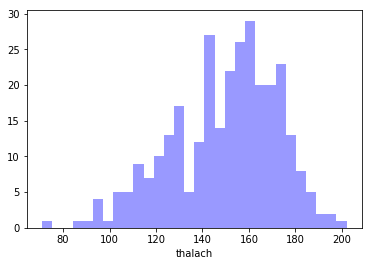

In [7]:
sns.distplot(df['thalach'], kde = False, bins=30, color='blue')

/home/ishamm/Software/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


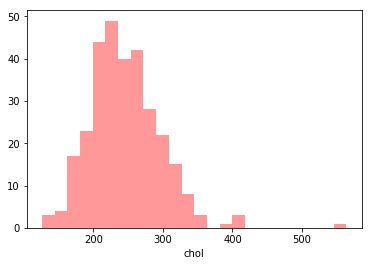

In [8]:
sns.distplot(df['chol'], kde=False,color='red')
plt.show()

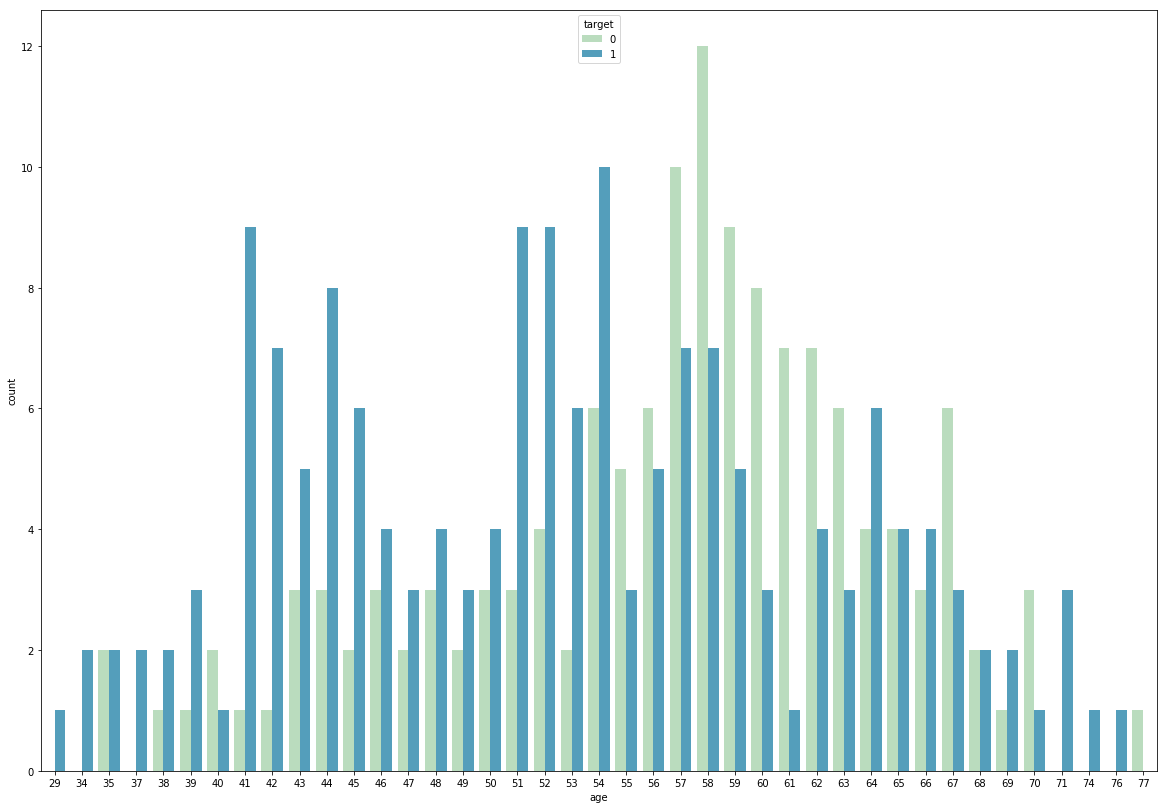

In [9]:
plt.figure(figsize=(20,14))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

<h2>Scatter Plots

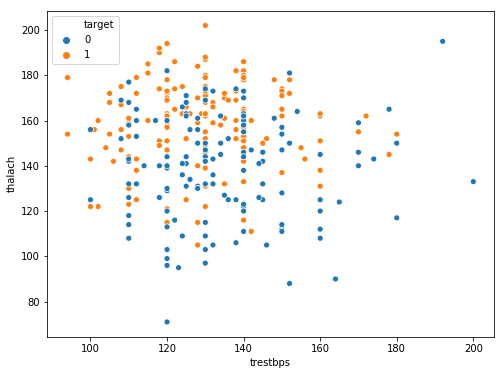

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

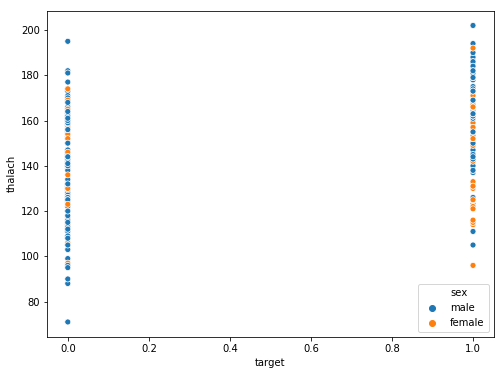

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h2>Swarm Plot

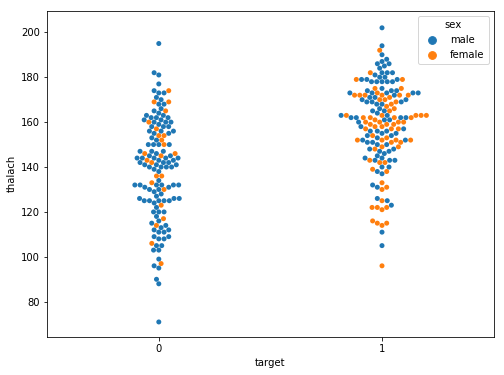

In [12]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h2>Box Plot

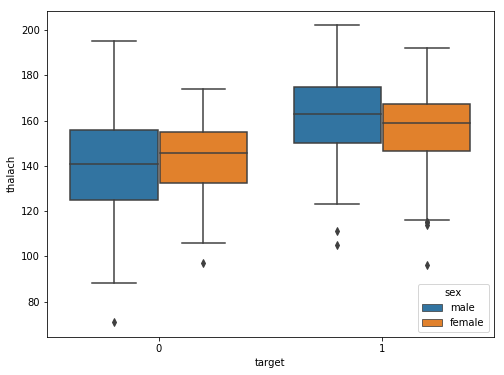

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h2>Violin Plot

/home/ishamm/Software/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


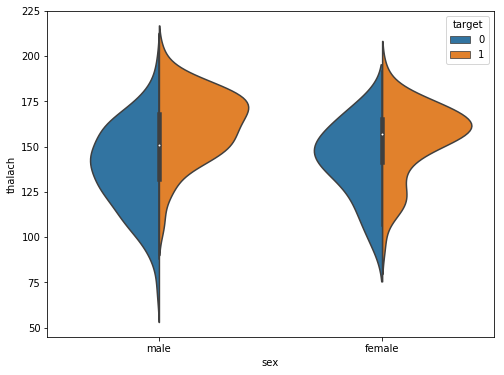

In [14]:
plt.figure(figsize=(8,6))
sns.violinplot(x='sex',y='thalach',data=df, hue='target', split=True)
plt.show()

<h1>Data Preprocessing

<h2>Handling Missing Values

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Drop NULL Value Columns

In [16]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


<h3>Fill NULL Values

In [17]:
df.fillna(method='bfill')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


<h3>Some Other Methods of Filling Null Values</h3>

**df.fillna(0)** - fill with "0" <br>
**df.fillna(method='bfill')** - fill with before value <br>
**df.fillna({'age': 10, 'sex': 1, 'cp': 1, 'trestbps': 130})** - fill with given values


<h2>Outlier Removal

<h3>Using Z-Score Approach

In [18]:
from scipy import stats 

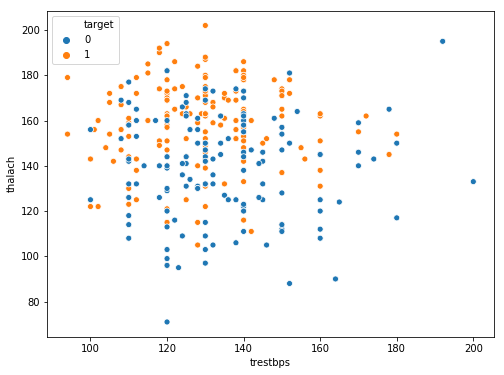

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

In [20]:
df2 = df[(np.abs(stats.zscore(df['thalach'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['trestbps'])) < 3)]

In [21]:
df2.shape[0]

300

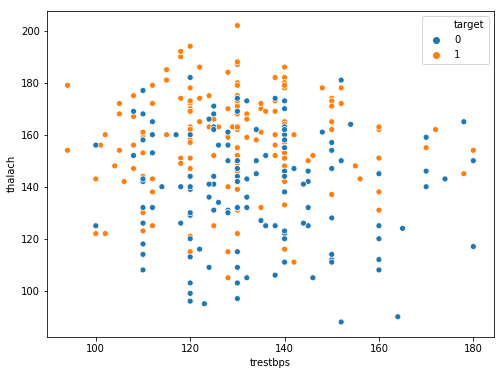

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df2, hue='target')
plt.show()

<h3>Using Quantile Approach

In [23]:
q = df['thalach'].quantile(0.7)
df3 = df[df['thalach'] < q]

q = df3['trestbps'].quantile(0.99)
df3 = df3[df3['trestbps'] < q]

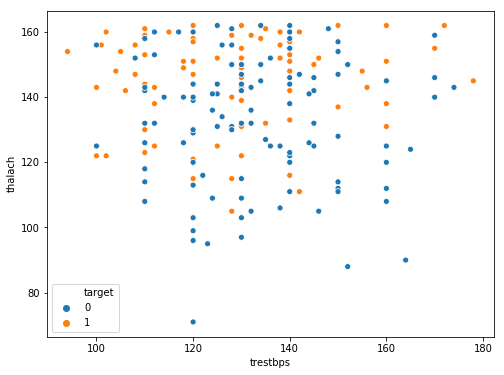

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df3, hue='target')
plt.show()

In [25]:
df3.shape[0]

205

In [26]:
df = df3

<h3>Encoding Categorical Variables

In [27]:
from sklearn import preprocessing

In [28]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1


In [29]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,56.609756,0.819512,131.253659,248.843902,0.15122,0.482927,138.780488,0.409756,1.259024,1.273171,0.843902,2.351220,0.439024
std,8.312163,1.039235,17.093860,54.403585,0.35914,0.529476,18.754231,0.492993,1.194710,0.596979,1.036124,0.674145,0.497483
min,35.000000,0.000000,94.000000,131.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,120.000000,212.000000,0.00000,0.000000,126.000000,0.000000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,58.000000,0.000000,130.000000,244.000000,0.00000,0.000000,143.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
75%,62.000000,2.000000,140.000000,278.000000,0.00000,1.000000,154.000000,1.000000,1.900000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,178.000000,564.000000,1.00000,2.000000,162.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
label_encoder = preprocessing.LabelEncoder()

In [31]:
df['sex'] = label_encoder.fit_transform(df['sex'])
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


<h3>Data Normalization

In [32]:
x = df[['chol', 'thalach']].values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(x)

/home/deshanig/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [34]:
pd.DataFrame(df_scaled).head(5)

,0,1
0,0.235566,0.868132
1,0.140878,0.846154
2,0.376443,0.901099
3,0.157044,1.000000
4,0.249423,0.978022


<h2>Feature Engineering

<h3>Correlation Analysis

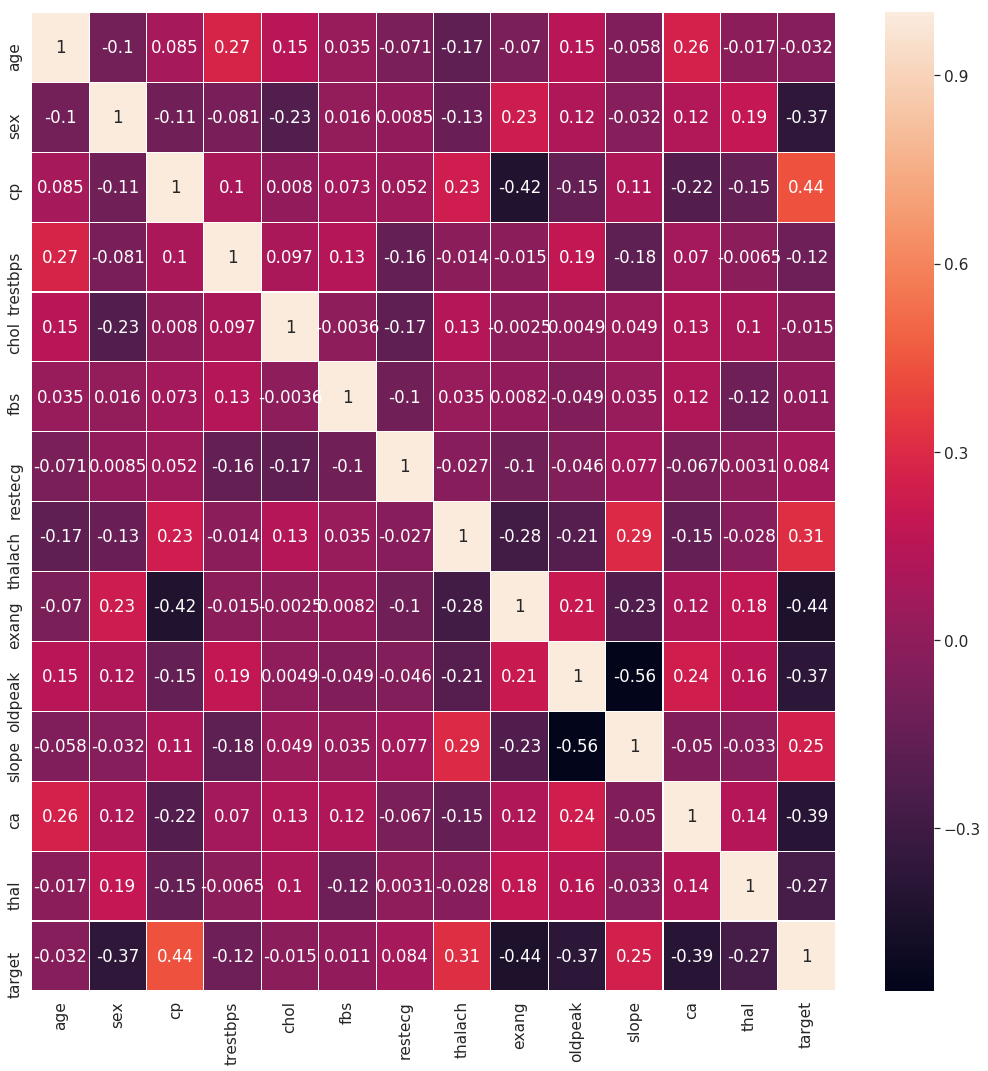

In [35]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [36]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [37]:
columns_to_drop = find_correlation(df.drop(columns=['target']) , 0.7)
df4 = df.drop(columns=columns_to_drop)

In [38]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1


In [39]:
corr = df.corr()
linear_features=abs(corr).target.drop('target').sort_values(ascending=False)[:5].keys()

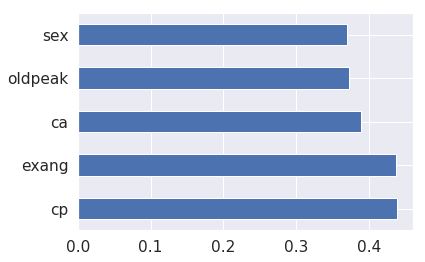

In [40]:
abs(corr).target.drop('target').sort_values(ascending=False)[:5].plot(kind='barh')

<h3>Using Random Forest Classifier to Identify Important Features

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['target']
model = rf.fit(df.drop('target', axis=1),y)

/home/deshanig/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


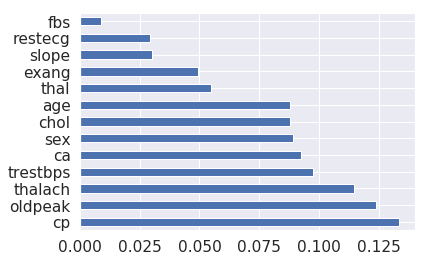

In [42]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('target', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<h3>Convert Categorical Variables into Dummy Variables

In [43]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [44]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [45]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1


In [46]:
df_1 = pd.get_dummies(df, drop_first=True)
df_1.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
5,57,140,192,148,0.4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
6,56,140,294,153,1.3,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
8,52,172,199,162,0.5,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1
10,54,140,239,160,1.2,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [47]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1


<h1>Applying ML Models

<h2>Split Train and Test sets

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1), df['target'], test_size = .2, random_state=10)

In [49]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3


<h2>Random Forest Classifier

In [50]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

0.7073170731707317


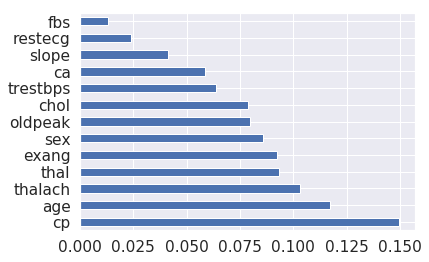

In [51]:
importance = model.feature_importances_
feat_importances_act = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<h3> Other Models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

('Logistic Regression :', 0.8536585365853658)
('Decision Tree Classification :', 0.6829268292682927)
('Random Forest Classification :', 0.7073170731707317)
('Gradient Boosting Classification :', 0.6829268292682927)
('Ada Boosting Classification :', 0.7317073170731707)
('Extra Tree Classification :', 0.7560975609756098)
('K-Neighbors Classification :', 0.5609756097560976)
('Support Vector Classification :', 0.4878048780487805)
('Gaussian Naive Bayes :', 0.8536585365853658)


/home/deshanig/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/deshanig/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h2>Hyper Parameter Tuning

<h3>Using Grid Search

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[19  1]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.94      0.76      0.84        21

   micro avg       0.85      0.85      0.85        41
   macro avg       0.87      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41

0.8536585365853658


In [54]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(df.drop('target', 1), df['target'])
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

('Best Penalty:', 'l1')
('Best C:', 1.0)


In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [56]:
np.logspace(0, 4)

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

In [57]:
logmodel=LogisticRegression(penalty='l2',C=21.544346900318832)
logmodel.fit(X_train,y_train)
h_log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,h_log_pred))
print(classification_report(y_test,h_log_pred))
print(accuracy_score(y_test,h_log_pred))

[[19  1]
 [ 6 15]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.94      0.71      0.81        21

   micro avg       0.83      0.83      0.83        41
   macro avg       0.85      0.83      0.83        41
weighted avg       0.85      0.83      0.83        41

0.8292682926829268


<h2> Model Evaluation

In [58]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,h_log_pred)

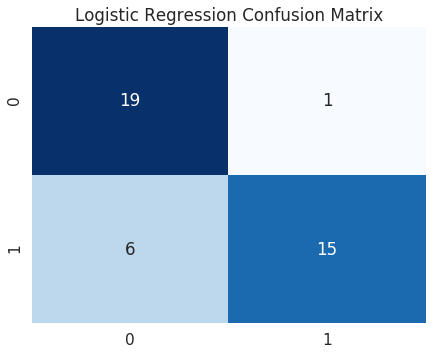

In [59]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

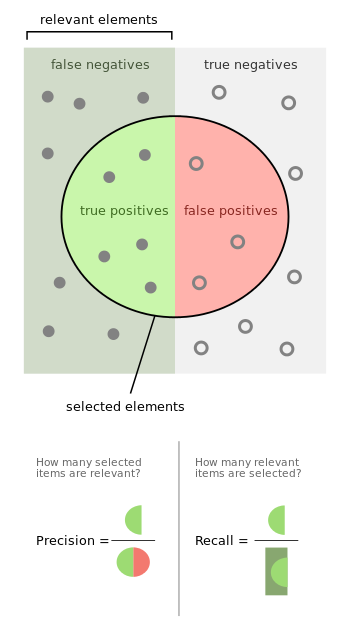

In [60]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test,logmodel.predict_proba(X_test), figsize = (20,20))
plt.figure(figsize=(40,18))
plt.show()

ModuleNotFoundError: No module named 'scikitplot'